## World Development Indicators - Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tabla = np.array(pd.read_csv("https://www.dropbox.com/s/d1i6rs5wyhuvyjd/economia7.csv?dl=1").drop('Unnamed: 0', 1))
pd.DataFrame(tabla).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.358406e+09,3.637845e+09,1.347350e+09,1.239080e+09,108.320559,0.071111,14517.635341,39348.639719,42622.666667,15786.172840,-1.046262,25735.714754,24723.111892,2.196543e+09,2.110118e+09
1,2.954188e+09,3.257308e+09,1.206410e+09,1.089944e+09,110.260684,-12.036015,12629.713786,34231.611819,37744.009270,13979.262693,-13.004332,22388.956865,21671.375749,1.932167e+09,1.870240e+09
2,2.743171e+09,3.065955e+09,1.135539e+09,1.012090e+09,111.766847,-7.142991,11602.142227,31446.478970,35146.738046,13017.310387,-8.136143,20567.359344,20151.309866,1.794152e+09,1.757859e+09
3,2.693974e+09,3.050780e+09,1.129918e+09,9.939385e+08,113.244595,-1.793436,11275.280156,30560.551094,34608.172248,12817.841573,-2.817256,19987.924139,19987.924139,1.761975e+09,1.761975e+09
4,2.802259e+09,3.252725e+09,1.204713e+09,1.033890e+09,116.075112,4.019542,11607.745344,31461.665675,36519.163794,13525.616220,2.948620,20577.292107,20946.700835,1.832799e+09,1.865702e+09


## Train Test Split

In [2]:
def splitter(tabla,y_indicator):
    from sklearn.model_selection import train_test_split
    # Asignamos X e y, eliminando la columna y en X
    X = np.delete(tabla[:,:], y_indicator, 1)
    y = tabla[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

## Métricas de error
### R2 Score - Coeficiente de Determinación
El mejor valor posible es 1.0

In [3]:
from sklearn.metrics import r2_score
def r2(y_true, y_predict):
    return r2_score(y_true, y_predict)

## Decission Tree Regressor

In [4]:
from sklearn.tree import DecisionTreeRegressor

def DTR(X_train, X_test, y_train, y_test):
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test

## Indicador a Predecir

In [5]:
y_indicator = 5

## Modificamos los valores nulos

In [6]:
def imputador(X):
    from sklearn.preprocessing import Imputer
    impute=Imputer(missing_values=0,strategy='mean',axis=0)
    impute.fit(X)
    X_imputado=impute.transform(X)
    return X_imputado

In [7]:
tabla_imputada = imputador(tabla)

## Normalizamos

In [8]:
def normalizar_datos(X):
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    return X_norm

In [9]:
tabla_normalizada = normalizar_datos(tabla)
tabla_imputada_normalizada = normalizar_datos(tabla_imputada)

## GridSearchCV

Efecutamos un GridSearchCV para buscar el mejor valor del parámetro Max_depth (Máximo valor: 10) para nuestro modelo

In [10]:
def Grid_Search_CV(X_train, y_train):
    from sklearn.grid_search import GridSearchCV
    from sklearn.cross_validation import ShuffleSplit

    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    return grid,best_max_depth

## Gráfica de Scores del GridSearchCV

Graficos de cada score para cada valor del parámetro max_depth 

In [11]:
def Grid_Search_CV_Plot(grid):
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    plt.plot(range(1,11), grid_mean_scores)
    plt.xlabel('Valor de Max_depth para el DecissionTreeRegressor')
    plt.ylabel('Cross-Validated R2')
    return plt.show()

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


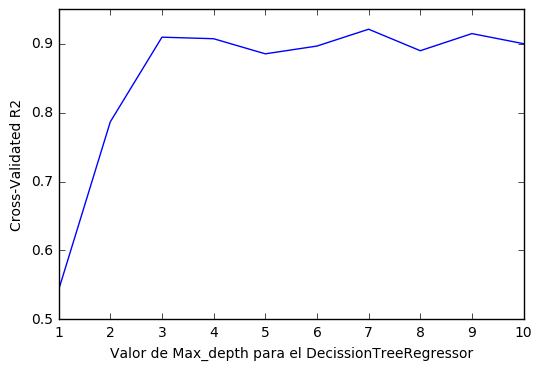

In [12]:
X_train, X_test, y_train, y_test = splitter(tabla_imputada,y_indicator)
grid,best_max_depth = Grid_Search_CV(X_train, y_train)
Grid_Search_CV_Plot(grid)

## DecissionTreeRegressor v2

Ajustamos nuestra función DTR, asignando el Max_depth en base al mejor score del GridSearchCV

In [13]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    R2_test = r2(y_test,y_predict)
    return R2_test

## Curva de Aprendizaje

In [14]:
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
  
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="test score")

    plt.legend(loc="best")
    return plt

C:\Program Files\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Tabla Imputada

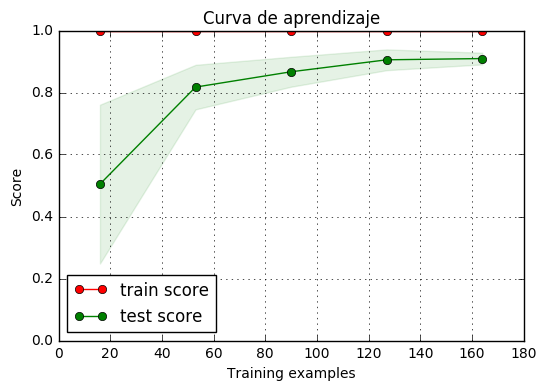

In [15]:
X = np.delete(tabla_imputada[:,:], y_indicator, 1)
y = tabla_imputada[:,y_indicator]

title = "Curva de aprendizaje"
estimator = DecisionTreeRegressor()
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2)

plot_learning_curve(estimator, title, X, y, ylim=(0,1), cv=cv, scoring='r2',n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)).show()

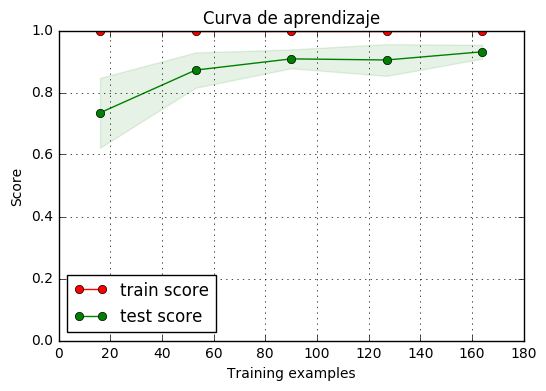

In [28]:
X = np.delete(tabla_normalizada[:,:], y_indicator, 1)
y = tabla_normalizada[:,y_indicator]

title = "Curva de aprendizaje"
estimator = DecisionTreeRegressor()
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2)

plot_learning_curve(estimator, title, X, y, ylim=(0,1), cv=cv, scoring='r2',n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)).show()

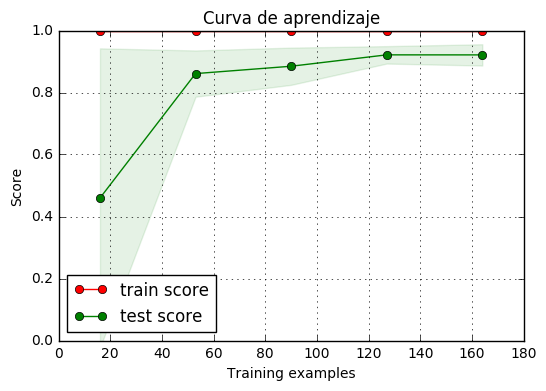

In [29]:
X = np.delete(tabla_imputada_normalizada[:,:], y_indicator, 1)
y = tabla_imputada_normalizada[:,y_indicator]

title = "Curva de aprendizaje"
estimator = DecisionTreeRegressor()
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2)

plot_learning_curve(estimator, title, X, y, ylim=(0,1), cv=cv, scoring='r2',n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)).show()

## Iteramos para todos los indicadores

In [30]:
R2_global = list()

for i in range(0,np.shape(tabla)[1]):
    ## Valores Originales
    X_train, X_test, y_train, y_test = splitter(tabla,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    ## Valores Normalizados
    X_train, X_test, y_train, y_test = splitter(tabla_normalizada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Normalizada_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)

    ## Sin Valores Nulos
    X_train, X_test, y_train, y_test = splitter(tabla_imputada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    ## Sin Valores Nulos Normalizada
    X_train, X_test, y_train, y_test = splitter(tabla_imputada_normalizada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_Normalizado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Normalizada_GridSearchCV,R2_Imputado_GridSearchCV,R2_Imputado_Normalizado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Normalizado','Imputando','Imputado+Normalizado'])

,Original,Normalizado,Imputando,Imputado+Normalizado
0,0.996450,0.998897,0.999857,0.997837
1,0.953889,0.990871,0.994040,0.973521
2,0.917896,0.957283,0.978863,0.980119
3,0.998549,0.995138,0.987242,0.997947
4,0.718538,0.851849,0.742129,0.992946
5,0.920290,0.927576,0.913605,0.918223
6,0.349840,0.823976,0.993586,0.833428
7,0.999078,0.996257,0.998807,0.995156
8,0.988859,0.858830,0.916157,0.996622
9,0.230946,0.694395,0.970484,0.959777


## Matriz de Correlación

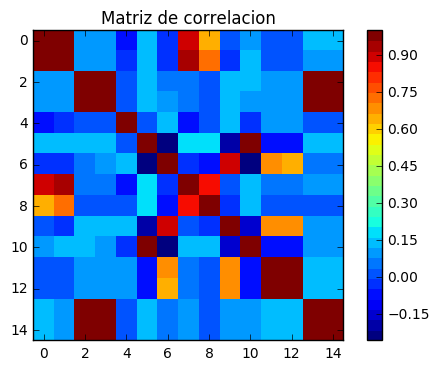

In [17]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    plt.show()

correlation_matrix(pd.DataFrame(tabla))

In [18]:
def correlacion(tabla,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tabla).corr())
    for i in range(np.shape(tabla)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)


    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tabla[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

## Splitter v2

Modificamos la función Splitter (train, test split) para que elimine las columnas de los indicadores que se correlacionan más

In [22]:
def splitter_v2(tabla,y_indicator):
    from sklearn.model_selection import train_test_split   

    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)
    X = correlacion(tabla,y_indicator)
    y = tabla[:,y_indicator]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

## Iteramos nuevamente

In [31]:
R2_global = list()

for i in range(0,np.shape(tabla)[1]):
    ## Valores Originales
    X_train, X_test, y_train, y_test = splitter_v2(tabla,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    ## Valores Normalizados
    X_train, X_test, y_train, y_test = splitter_v2(tabla_normalizada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Normalizada_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)

    ## Sin Valores Nulos
    X_train, X_test, y_train, y_test = splitter_v2(tabla_imputada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    ## Sin Valores Nulos Normalizada
    X_train, X_test, y_train, y_test = splitter_v2(tabla_imputada_normalizada,i)
    grid,best_max_depth = Grid_Search_CV(X_train, y_train)
    R2_Imputado_Normalizado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
    
    # Recopilamos los R2
    R2_global.append(np.array([R2_Original_GridSearchCV,R2_Normalizada_GridSearchCV,R2_Imputado_GridSearchCV,R2_Imputado_Normalizado_GridSearchCV]))

pd.DataFrame(R2_global,columns=['Original','Normalizado','Imputando','Imputado+Normalizado'])

,Original,Normalizado,Imputando,Imputado+Normalizado
0,0.998438,0.998959,0.995053,0.998295
1,0.935597,-0.045244,-3.593782,0.971718
2,0.989792,0.636665,0.947508,0.985911
3,0.992265,0.989652,0.434537,0.955787
4,0.818856,0.762707,0.857498,0.988944
5,0.265034,-0.009061,0.081624,0.082934
6,0.983288,0.683779,0.980743,0.505031
7,0.524199,-2.222573,0.678679,0.988324
8,0.998702,0.960907,0.988212,0.993489
9,0.873084,0.507415,0.624424,0.748233


## Iteramos individualmente el nuevo Splitter v2

### Iteramos en base al R2_Original (Sin modificar la tabla)

In [42]:
def iter_R2(tab,iteraciones):
    temporal = []
    iter_R2_Original_GridSearchCV = []
    for k in range(np.shape(tab)[1]):
        for i in range(iteraciones):
            ## Valores Originales
            X_train, X_test, y_train, y_test = splitter_v2(tab,k)
            grid,best_max_depth = Grid_Search_CV(X_train, y_train)
            R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test, best_max_depth)
            temporal.append(R2_Original_GridSearchCV)
        iter_R2_Original_GridSearchCV.append(temporal)
        temporal = []
    return iter_R2_Original_GridSearchCV

#### Media de las Iteraciones R2 para cada indicador en cada caso

In [38]:
def iter_mean(iter_score):
    temporal = np.array([iter_score])
    mean_score = []

    for k in range(np.shape(tabla)[1]):
        mean_score.append(np.mean(temporal[:,k]))
        
    return mean_score

In [43]:
pd.DataFrame(np.column_stack((iter_mean(iter_R2(tabla,20)),iter_mean(iter_R2(tabla_imputada,20)),iter_mean(iter_R2(tabla_imputada_normalizada,20)))),columns=['Original','Normalizado','Imputando'])

,Original,Normalizado,Imputando
0,0.973462,0.990743,0.948036
1,-0.734662,0.451605,-6.589096
2,0.842180,0.763153,0.910435
3,0.191487,0.655899,0.889015
4,0.835864,0.828397,0.812624
5,0.105796,0.139265,0.054580
6,0.688069,0.626152,0.628511
7,0.247234,-0.202172,-1.834312
8,0.987872,0.967166,0.968679
9,0.568028,0.543631,0.580160


Con lo cual determinamos que según el R2 iterado (>70%) los indicadores:

- R2 Original:     0,1,4,6,7,8,9,11 y 12 
- R2 Imputado:     0,4,6,7,8,11
- R2 GridSearchCV: 0,4,6,8,11

Son más fácilmente predecibles con nuestro modelo